# Importing the Libraries and loading the Data


In [ ]:
# Important libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [ ]:
# Creating a Funtion for a shareable link from Google
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"


# Google Drive file ids
files_id = {
    "brands": "1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD",
    "orderlines": "1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG",
    "orders": "1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ",
    "products":"1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU"
}

# Reading in the data
brands = pd.read_csv(gd_path(files_id['brands']), sep =',')
orderlines = pd.read_csv(gd_path(files_id['orderlines']), sep =',')
orders = pd.read_csv(gd_path(files_id['orders']), sep =',')
products = pd.read_csv(gd_path(files_id['products']), sep =',')

# Overview and investigating the Data

Performing Exploratory Data Analysis (EDA)

Here’s a description of each table and its columns:

+ orders.csv – Every row in this file represents an order.

> + order_id – a unique identifier for each order
+ created_date – a timestamp for when the order was created
+ total_paid – the total amount paid by the customer for this order, in euros
state
+ “Shopping basket” – products have been placed in the shopping basket
+ “Place Order” – the order has been placed, but is awaiting shipment details
+ “Pending” – the order is awaiting payment confirmation
+ “Completed” – the order has been placed and paid, and the transaction is completed.
+ “Cancelled” – the order has been cancelled and the payment returned to the customer.


+ orderlines.csv – Every row represents each one of the different products involved in an order.


> + id – a unique identifier for each row in this file
+ id_order – corresponds to orders.order_id
+ product_id – an old identifier for each product, nowadays not in use
+ product_quantity – how many units of that product were purchased on that order
+ sku – stock keeping unit: a unique identifier for each product
+ unit_price – the unitary price (in euros) of each product at the moment of placing that order
+ date – timestamp for the processing of that product

+ products.csv


> + sku – stock keeping unit: a unique identifier for each product
name – product name
+ desc – product description
+ in_stock – whether or not the product was in stock at the moment of the data extraction
+ type – a numerical code for product type
+ promo_price – promotional price, in euros

+ brands.csv


> + short – the 3-character code by which the brand can be identified in the first 3 characters of products.sku
+ long – brand name

# Data Cleaning

In [ ]:
# For Grace
brands_gr = brands.copy()
orders_gr = orders.copy()
orderlines_gr = orderlines.copy()
products_gr = products.copy()

## brands



In [ ]:
brands_gr.describe()

,short,long
count,187,187
unique,187,181
top,8MO,Mophie
freq,1,2


In [ ]:
brands_gr[brands_gr['long'] == 'Mophie']

,short,long
94,MOP,Mophie
98,MUJ,Mophie


In [ ]:
brands_gr[brands_gr['long'] == 'Apple']

,short,long
6,AP2,Apple
7,APP,Apple


In [ ]:
brands_gr[brands_gr['long'] == 'Startech']

,short,long
117,OTR,Startech
153,STA,Startech


In [ ]:
brands_gr[brands_gr['long'] == 'Jaybird']

,short,long
67,JYB,Jaybird
70,KEN,Jaybird


In [ ]:
brands_gr[brands_gr['long'] == 'Unknown']

,short,long
37,ENV,Unknown
80,LIB,Unknown


In [ ]:
brands_gr.loc[brands_gr['short'] == 'MUJ', 'long']= 'Mujjo'

In [ ]:
brands_gr.loc[brands_gr['short'] == 'KEN', 'long']= 'Kensington'

In [ ]:
# cleaning the brands table by removing the rows that have unknown

brands_gr = brands_gr.drop(brands_gr[brands_gr['long'] == 'Unknown'].index)

In [ ]:
# cleaning the brands table by removing the rows that have CAD

brands_gr = brands_gr.drop(brands_gr[brands_gr['short'] == 'CAD'].index)

In [ ]:
brands_gr.describe()

,short,long
count,184,184
unique,184,182
top,8MO,Startech
freq,1,2


In [ ]:
brands_gr.long.value_counts()

Startech            2
Apple               2
8Mobility           1
Prynt               1
Parrot              1
Pebble              1
Philips             1
Replacement         1
Plantronics         1
Polaroid            1
Pqi                 1
Promise             1
Puro                1
OWC                 1
Qardio              1
QDos                1
QNAP                1
Rain Design         1
Repair              1
Retrak Utopia       1
Runstastic          1
Ryval               1
Samsung             1
Pack                1
Otterbox            1
Satechi             1
Nimbus              1
Mujjo               1
Muvit               1
MyFox               1
Nonda               1
Ndevr               1
Netatmo             1
Nest                1
Ninebot             1
Nokia               1
Osmo                1
Nodon               1
Noke                1
Nomad               1
NewerTech           1
Oblumi              1
Olixar              1
Olloclip            1
Opulus              1
SanDisk   

In [ ]:
brands_gr

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


In [ ]:
clean_brands = brands_gr.copy()

## orders table

In [ ]:
orders_gr.shape

(226909, 4)

In [ ]:
orders_gr = orders_gr.drop_duplicates()# no duplicated rows

In [ ]:
orders_gr.isna().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [ ]:
orders_gr['total_paid'] = pd.to_numeric(orders_gr['total_paid'])

In [ ]:
orders_gr[orders_gr.total_paid.isna()==True] # what do we do? do we make the toatal_paid 0€ since their status is pending?
#or we replace it with the mean payment of the pending orders so that it does not affect the statistics. I dropped it

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


In [ ]:
orders_gr = orders_gr.dropna(subset = 'total_paid')

In [ ]:
orders_gr.loc[orders_gr.state=='Pending']

,order_id,created_date,total_paid,state
7,245851,2017-04-04 20:58:21,79.99,Pending
17,252371,2017-02-09 12:31:57,27.98,Pending
24,254537,2017-05-23 19:58:30,102.97,Pending
27,256434,2018-02-26 07:32:21,39.99,Pending
32,258087,2017-02-28 19:15:24,84.73,Pending
...,...,...,...,...
226877,527370,2018-03-14 13:47:00,19.98,Pending
226880,527373,2018-03-14 13:44:45,31.38,Pending
226886,527379,2018-03-14 13:50:49,9.99,Pending
226898,527391,2018-03-14 13:57:54,54.98,Pending


In [ ]:
orders_gr['created_date']=pd.to_datetime(orders_gr['created_date'])

<ipython-input-151-19590602c61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_gr['created_date']=pd.to_datetime(orders_gr['created_date'])


In [ ]:
orders_gr['date'] =pd.to_datetime(orders_gr['created_date']).dt.date

In [ ]:
orders_gr['time'] =pd.to_datetime(orders_gr['created_date']).dt.time

In [ ]:
orders_gr['order_year'] =pd.to_datetime(orders_gr['created_date']).dt.year

In [ ]:
orders_gr['order_month'] =pd.to_datetime(orders_gr['created_date']).dt.strftime('%B') #or dt.month_name()

In [ ]:
orders_gr['order_weekday'] =pd.to_datetime(orders_gr['created_date']).dt.day_name()

In [ ]:
orders_gr['order_day'] =pd.to_datetime(orders_gr['created_date']).dt.day

In [ ]:
orders_gr['total_paid'] = round(orders_gr['total_paid'], 2)

In [ ]:
orders_gr

,order_id,created_date,total_paid,state,date,time,order_year,order_month,order_weekday,order_day
0,241319,2017-01-02 13:35:40,44.99,Cancelled,2017-01-02,13:35:40,2017,January,Monday,2
1,241423,2017-11-06 13:10:02,136.15,Completed,2017-11-06,13:10:02,2017,November,Monday,6
2,242832,2017-12-31 17:40:03,15.76,Completed,2017-12-31,17:40:03,2017,December,Sunday,31
3,243330,2017-02-16 10:59:38,84.98,Completed,2017-02-16,10:59:38,2017,February,Thursday,16
4,243784,2017-11-24 13:35:19,157.86,Cancelled,2017-11-24,13:35:19,2017,November,Friday,24
...,...,...,...,...,...,...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order,2018-03-14,13:56:38,2018,March,Wednesday,14
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket,2018-03-14,13:57:25,2018,March,Wednesday,14
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket,2018-03-14,13:57:34,2018,March,Wednesday,14
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket,2018-03-14,13:57:41,2018,March,Wednesday,14


In [ ]:
clean_orders = orders_gr.copy()

## products

In [ ]:
products_gr.duplicated().sum()

8746

In [ ]:
products_gr.shape

(19326, 7)

In [ ]:
products_gr = products_gr.drop_duplicates()

In [ ]:
products_gr.shape

(10580, 7)

In [ ]:
products_gr.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [ ]:
products_gr = products_gr.dropna(subset='price')

In [ ]:
products_gr = products_gr.dropna(subset='desc')

In [ ]:
products_gr.price.str.contains('^\d{,}.\d{,}$').value_counts(normalize=True)

True    0.96
False   0.04
Name: price, dtype: float64

In [ ]:
products_gr = products_gr.loc[products_gr.price.str.contains('^\d{,}.\d{,}$')==True]

In [ ]:
products_gr.shape

(10151, 7)

In [ ]:
products_gr.promo_price.str.contains('^\d{,}.\d{,}$').value_counts(normalize=True)

True    0.57
False   0.43
Name: promo_price, dtype: float64

In [ ]:
new_promo = []

for promo, price in zip(products_gr['promo_price'], products_gr['price']):
    price = str(price)
    promo = str(promo)

    if "." in price and price.count('.') == 1:
        promo = promo.replace(".", "")
        promo = promo[:price.index(".")] + "." + promo[price.index("."):]
        if round(float(promo)) > round(float(price)):
            promo = promo.replace(".", "")
            promo = promo[:price.index(".")-1] + "." + promo[price.index(".")-1:]

    if price != 'nan' and price.count('.') == 0:
        promo = promo.replace(".", "")
        promo = promo[:len(price)] + "." + promo[len(price):]
        if round(float(promo)) > round(float(price)):
            promo = promo.replace(".", "")
            promo = promo[:len(price)-1] + "." + promo[len(price)-2:]
    new_promo.append(promo)


In [ ]:
len(new_promo)

10151

In [ ]:
products_gr['new_promo'] =new_promo

In [ ]:
products_gr['price'] = pd.to_numeric(products_gr['price'])

In [ ]:
products_gr['price'] = round(products_gr['price'].astype(float), 2)

In [ ]:
products_gr['new_promo'] = pd.to_numeric(products_gr['new_promo'])

In [ ]:
products_gr['new_promo'] = round(products_gr['new_promo'].astype(float), 2)

In [ ]:
products_gr

,sku,name,desc,price,promo_price,in_stock,type,new_promo
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,49.99
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,59.00
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,56.99
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,23.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,31.99
...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,26.99
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,64.99
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,64.99
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,64.99


In [ ]:
products_gr = products_gr.loc[products_gr['price'] >= products_gr['new_promo']]

In [ ]:
products_gr['product_brand'] = products_gr.sku.str.extract('(^\w{3})') #or products_gr['product_brand'] = products_gr.sku.str[0:3]

<ipython-input-181-7c722626729a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_gr['product_brand'] = products_gr.sku.str.extract('(^\w{3})') #or products_gr['product_brand'] = products_gr.sku.str[0:3]


In [ ]:
products_gr['discount'] = products_gr.apply(lambda record: round(((record['price'] - record['new_promo']) / record['price'])*100, 2), axis=1)
#or
# products_gr['discount'] = round(((products_gr['price'] - products_gr['new_promo']) / products_gr['price']), 2)

<ipython-input-182-61674ebf12ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_gr['discount'] = products_gr.apply(lambda record: round(((record['price'] - record['new_promo']) / record['price'])*100, 2), axis=1)


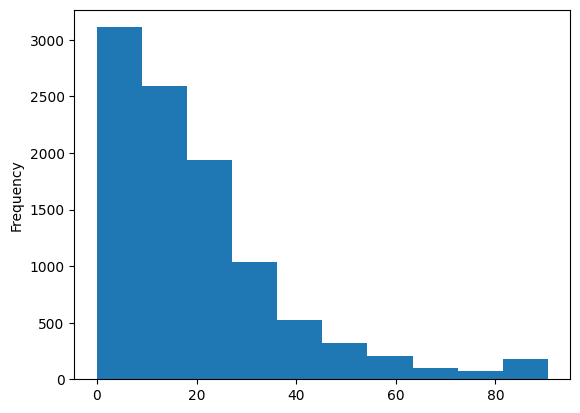

In [ ]:
products_gr['discount'].plot(kind='hist');

In [ ]:
products_gr[products_gr['discount']<=70].shape

(9793, 10)

In [ ]:
products_gr[products_gr['discount']>70].count()

sku              278
name             278
desc             278
price            278
promo_price      278
in_stock         278
type             270
new_promo        278
product_brand    278
discount         278
dtype: int64

In [ ]:
#products_gr = products_gr.loc[~(products_gr['discount']>70)]

In [ ]:
type_categories = {'8696':'accessories', '13855401': 'keyboard', '1387':'mouse', '1230':'accessories', '1364':'computer', '1325':'accessories', '5384':'audio',
 '1334':'accessories', '13005399': 'accessories', '12995397': 'accessories', '11865403': 'phone_accessories', '13955395' :'accessories', '1216':'accessories',
 '12355400': 'accessories', '1276' : 'computer_accessories', '11905404':'others', '12635403':'accessories', '12755395':'accessories', '13835403':'computer_accessories',
 '1296':'computer', '12285400': 'phone_accessories', '1229':'accessories', '11935397':'storage', '12655397':'storage', '1404':'others', '101781405':'others',  '4259':'audio', '14035403':'phone',
 '12085400':'accessories', '1282':'computer', '12175397':'storage', '1424':'media', '9094':'security', '1405':'computer_accessories',  '57445397':'storage', '14305406':'computer_accessories',
 '10142':'battery','12645406':'phone_accessories', '10230':'computer_accessories', '12215397':'storage', '11821715':'audio',  '13555403':'phone_accessories', '14365395':'phone_accessories',
 '5405':'phone_accessories', '5395':'electrical_appliances', '5398':'audio', '21485407':'phone_accessories', '20642062':'storage', '1280':'others', '1433':'storage', '1515':'battery',
 '5720':'phone_accessories', '1298':'storage', '13615399':'electrical_appliances', '12585395':'computer_accessories',  '1392':'computer_accessories', '1231':'others', '15435404':'computer_accessories',
 '1375':'computer_accessories', '42945397':'storage', '12141714':'computer', '54025401':'accessories', '12575403':'keyboard', '21535407':'accessories', '1416':'others', '24215399':'watch_accessories',
 '11434':'computer_accessories', '2434':'watch_accessories', '2449':'watch_accessories',  '2425':'watch_accessories', '13621714':'phone', '24861714':'phone', '24821716':'phone',
 '54864259':'tv_accessories', '1714':'phone', '51601716':'phone', '51871714':'computer', '5403':'computer_accessories', '54085407':'computer_accessories', '24885185':'watch', '24895185':'watch',
 '5407':'phone_accessories', '5406':'others', '5404':'others', '85641716':'phone', '42931714':'computer', '24811716':'phone', '85651716':'phone', '2158':'computer', '51882158':'computer',
 '5401':'keyboard', '12051714':'others', '5399':'phone_accessories', '1716':'phone', '21622158':'computer', '12031714':'computer', '51861714':'computer', '21571716':'phone', '106431714':'phone',
 '21632158':'computer', '79201715':'audio', '21561716':'phone', '51902158':'computer', '113291716':'phone', '113281716':'phone', '113271716':'phone', '113851714':'computer', '11859':'others',
 '118692158':'computers', '51912158':'computer', '113464259':'audio', '12282':'watch_accessories'}

not_found = ['5,49E+11', '1,44E+11', '1,46E+11', '2,17E+11', '5,74E+15', '5,44E+11', '1,02E+12', '5,72E+15', '5,39E+11', '2,16E+11', '5,45E+15']

products_gr['product_category'] = products_gr['type'].astype(str).map(type_categories).fillna('Unknown')

<ipython-input-187-9e63604a7f37>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_gr['product_category'] = products_gr['type'].astype(str).map(type_categories).fillna('Unknown')


In [ ]:
products_gr.loc[((products_gr['product_category']=='accessories') & (products_gr['desc'].str.contains('imac|pc|macbook|mac', case=False))), 'product_category'] = 'computer_accessories'
products_gr.loc[((products_gr['product_category']=='accessories') & (products_gr['desc'].str.contains('iphone', case=False))), 'product_category'] = 'phone_accessories'
products_gr.loc[((products_gr['product_category']=='computers') & (products_gr['desc'].str.contains('ipad', case=False))), 'product_category'] = 'tablets'
products_gr.loc[((products_gr['product_category']=='phone') & (products_gr['desc'].str.contains('ipad', case=False))), 'product_category'] = 'tablets'
products_gr.loc[((products_gr['product_category']=='Unknown') & (products_gr['desc'].str.contains('laptop|computer|imac|macbook', case=False))), 'product_category'] = 'computers'
products_gr.loc[((products_gr['product_category']=='Unknown') & (products_gr['desc'].str.contains('case', case=False))), 'product_category'] = 'phone_accessories'
products_gr.loc[((products_gr['product_category']=='Unknown') & (products_gr['desc'].str.contains('repair|diagnosis|labor', case=False))), 'product_category'] = 'insurance'
products_gr.loc[((products_gr['product_category']=='storage') & (products_gr['desc'].str.contains('monitor', case=False))), 'product_category'] = 'computers'
products_gr.loc[((products_gr['product_category']=='storage') & (products_gr['desc'].str.contains('laptop', case=False))), 'product_category'] = 'computers'
products_gr.loc[((products_gr['product_category']=='storage') & (products_gr['desc'].str.contains('smartwatch', case=False))), 'product_category'] = 'watch'
products_gr.loc[((products_gr['product_category']=='storage') & (products_gr['name'].str.contains('apple iphone', case=False))), 'product_category'] = 'phone'
products_gr.loc[((products_gr['product_category']=='storage') & (products_gr['name'].str.contains('apple ipad', case=False))), 'product_category'] = 'tablets'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['desc'].str.contains('smartwatch|Smart Watch', case=False))), 'product_category'] = 'watch'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['name'].str.contains('power wireless sensor', case=False))), 'product_category'] = 'electrical_accessories'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['name'].str.contains('motion sensor', case=False))), 'product_category'] = 'security'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['desc'].str.contains('baby monitor', case=False))), 'product_category'] = 'security'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['desc'].str.contains('baby monitor', case=False))), 'product_category'] = 'security'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['desc'].str.contains('selfie', case=False))), 'product_category'] = 'phone_accessories'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['name'].str.contains('smartwatch', case=False))), 'product_category'] = 'watch'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['desc'].str.contains('warranty', case=False))), 'product_category'] = 'insurance'
products_gr.loc[((products_gr['product_category']=='others') & (products_gr['name'].str.contains('apple ipad', case=False))), 'product_category'] = 'tablets'

products_gr.loc[products_gr['product_category'] == 'keyboard', 'product_category'] = 'computer_accessories'
products_gr.loc[products_gr['product_category'] == 'mouse', 'product_category'] = 'computer_accessories'
products_gr.loc[products_gr['product_category'] == 'audio', 'product_category'] = 'multimedia'
products_gr.loc[products_gr['product_category'] == 'media', 'product_category'] = 'multimedia'
products_gr.loc[products_gr['product_category'] == 'tv_accessories', 'product_category'] = 'multimedia'
products_gr.loc[products_gr['product_category'] == 'electrical_appliances', 'product_category'] = 'electrical_accessories'
products_gr.loc[products_gr['product_category'] == 'battery', 'product_category'] = 'electrical_accessories'

products_gr.loc[(products_gr['product_category'].str.contains('accessories', case=False)), 'product_category'] = 'accessories'
products_gr.loc[(products_gr['product_category'].str.contains('insurance', case=False)), 'product_category'] = 'services'
products_gr.loc[(products_gr['product_category'].str.contains('multimedia', case=False)), 'product_category'] = 'media'
products_gr.loc[(products_gr['product_category'].str.contains('phone', case=False)), 'product_category'] = 'phones'
products_gr.loc[(products_gr['product_category'].str.contains('unknown', case=False)), 'product_category'] = 'accessories'
products_gr.loc[(products_gr['product_category'].str.contains('watch', case=False)), 'product_category'] = 'watches'

In [ ]:
products_gr

,sku,name,desc,price,promo_price,in_stock,type,new_promo,product_brand,discount,product_category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,49.99,RAI,16.67,accessories
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,59.00,APP,0.00,accessories
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,56.99,APP,3.41,accessories
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,23.00,APP,8.00,accessories
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,31.99,KIN,8.57,computer
...,...,...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,26.99,BEL,10.00,accessories
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,64.99,THU,7.09,accessories
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,64.99,THU,7.09,accessories
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,64.99,THU,7.09,accessories


In [ ]:
products_gr.product_category.unique()

array(['accessories', 'computer', 'media', 'others', 'storage', 'tablets',
       'security', 'services', 'computers', 'watches', 'phones'],
      dtype=object)

In [ ]:
clean_products = products_gr.copy()

In [ ]:
# products table is complete

## orderlines

In [ ]:
orderlines_gr

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
orderlines_gr.shape

(293983, 7)

In [ ]:
orderlines_gr.duplicated().sum()

0

In [ ]:
orderlines_gr.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [ ]:
orderlines_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
import re

def convert_price(record):

  if re.match(r'^\d+\.\d{1,3}$', record):
    return record

  else:
    parts = record.split('.')
    if len(parts) == 3:
      return float(record.split('.')[0] + record.split('.')[1] + '.' + record.split('.')[2])
    else:
      return record

In [ ]:
orderlines_gr['unit_price'] = orderlines_gr['unit_price'].apply(convert_price)

In [ ]:
orderlines_gr.unit_price.str.contains('^\d{,}\.\d{,3}$').value_counts(normalize=True)

True    1.00
False   0.00
Name: unit_price, dtype: float64

In [ ]:
orderlines_gr = orderlines_gr.loc[orderlines_gr['unit_price'].str.match(r'^\d+\.\d{1,3}$', na=False)] # or # orderlines_gr.loc[orderlines_gr.unit_price.str.contains('^\d{,}\.\d{,3}$') == True]

In [ ]:
orderlines_gr.shape

(257813, 7)

In [ ]:
orderlines_gr['unit_price'] = pd.to_numeric(orderlines_gr['unit_price'])

<ipython-input-203-94a718d7ffca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_gr['unit_price'] = pd.to_numeric(orderlines_gr['unit_price'])


In [ ]:
orderlines_gr

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
clean_orderlines = orderlines_gr.copy()

## Data merging

In [ ]:
# to selct an create a giant table
# but first clean the orders and select the data we want

In [ ]:
clean_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10071 entries, 0 to 19325
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku               10071 non-null  object 
 1   name              10071 non-null  object 
 2   desc              10071 non-null  object 
 3   price             10071 non-null  float64
 4   promo_price       10071 non-null  object 
 5   in_stock          10071 non-null  int64  
 6   type              10024 non-null  object 
 7   new_promo         10071 non-null  float64
 8   product_brand     10071 non-null  object 
 9   discount          10071 non-null  float64
 10  product_category  10071 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 944.2+ KB


In [ ]:
clean_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257813 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                257813 non-null  int64  
 1   id_order          257813 non-null  int64  
 2   product_id        257813 non-null  int64  
 3   product_quantity  257813 non-null  int64  
 4   sku               257813 non-null  object 
 5   unit_price        257813 non-null  float64
 6   date              257813 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 15.7+ MB


In [ ]:
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_id       226904 non-null  int64         
 1   created_date   226904 non-null  datetime64[ns]
 2   total_paid     226904 non-null  float64       
 3   state          226904 non-null  object        
 4   date           226904 non-null  object        
 5   time           226904 non-null  object        
 6   order_year     226904 non-null  int64         
 7   order_month    226904 non-null  object        
 8   order_weekday  226904 non-null  object        
 9   order_day      226904 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 19.0+ MB


In [ ]:
clean_brands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   184 non-null    object
 1   long    184 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


### Grace: create the giant table for analysis

first select the data that is needed from each table

In [ ]:
clean_orderlines

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
clean_orderlines.id_order.nunique()

186822

In [ ]:
clean_orderlines = clean_orderlines[clean_orderlines.sku.isin(list(clean_products.sku.unique()))]

In [ ]:
clean_orderlines.shape

(250831, 7)

In [ ]:
clean_orders.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

In [ ]:
def completed_orders(record):
  return record.loc[record['state'].isin(['Completed'])]

In [ ]:
clean_orders_completed = clean_orders.pipe(completed_orders)

In [ ]:
clean_orders_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       46605 non-null  int64         
 1   created_date   46605 non-null  datetime64[ns]
 2   total_paid     46605 non-null  float64       
 3   state          46605 non-null  object        
 4   date           46605 non-null  object        
 5   time           46605 non-null  object        
 6   order_year     46605 non-null  int64         
 7   order_month    46605 non-null  object        
 8   order_weekday  46605 non-null  object        
 9   order_day      46605 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 3.9+ MB


In [ ]:
clean_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250831 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                250831 non-null  int64  
 1   id_order          250831 non-null  int64  
 2   product_id        250831 non-null  int64  
 3   product_quantity  250831 non-null  int64  
 4   sku               250831 non-null  object 
 5   unit_price        250831 non-null  float64
 6   date              250831 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 15.3+ MB


In [ ]:
def common_orders(record1, record2, key1:str, key2:str):

  return record1.merge(record2, how = 'inner', left_on =key1, right_on = key2)

In [ ]:
common_id_list = list(common_orders(clean_orders_completed, clean_orderlines, 'order_id', 'id_order').id_order)

In [ ]:
clean_orders_completed_id = clean_orders_completed[clean_orders_completed['order_id'].isin(common_id_list)]

In [ ]:
clean_orderlines_id = clean_orderlines[clean_orderlines['id_order'].isin(common_id_list)]

In [ ]:
len(clean_orderlines_id.id_order.unique())

43122

In [ ]:
len(clean_orders_completed_id.order_id.unique())

43122

In [ ]:
len(clean_orders_completed_id.order_id)

43122

In [ ]:
len(clean_orderlines_id.id_order)

56779

In [ ]:
clean_orders_completed_id

,order_id,created_date,total_paid,state,date,time,order_year,order_month,order_weekday,order_day
1,241423,2017-11-06 13:10:02,136.15,Completed,2017-11-06,13:10:02,2017,November,Monday,6
2,242832,2017-12-31 17:40:03,15.76,Completed,2017-12-31,17:40:03,2017,December,Sunday,31
3,243330,2017-02-16 10:59:38,84.98,Completed,2017-02-16,10:59:38,2017,February,Thursday,16
5,245275,2017-06-28 11:35:37,149.00,Completed,2017-06-28,11:35:37,2017,June,Wednesday,28
6,245595,2017-01-21 12:52:47,112.97,Completed,2017-01-21,12:52:47,2017,January,Saturday,21
...,...,...,...,...,...,...,...,...,...,...
226549,527042,2018-03-14 11:47:50,18.98,Completed,2018-03-14,11:47:50,2018,March,Wednesday,14
226577,527070,2018-03-14 11:50:48,24.97,Completed,2018-03-14,11:50:48,2018,March,Wednesday,14
226581,527074,2018-03-14 11:51:42,24.97,Completed,2018-03-14,11:51:42,2018,March,Wednesday,14
226603,527096,2018-03-14 11:58:40,34.96,Completed,2018-03-14,11:58:40,2018,March,Wednesday,14


In [ ]:
clean_orderlines_id

,id,id_order,product_id,product_quantity,sku,unit_price,date
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
18,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
24,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
293599,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
293616,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
293621,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
293644,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [ ]:
pay_diff = clean_orders_completed_id.groupby(['created_date','date','order_year','order_month','order_day','time','order_id'], as_index = False)['total_paid'].sum()\
.merge(clean_orderlines_id, how = 'inner', left_on ='order_id', right_on = 'id_order')

In [ ]:
pay_diff

,created_date,date_x,order_year,order_month,order_day,time,order_id,total_paid,id,id_order,product_id,product_quantity,sku,unit_price,date_y
0,2017-01-01 01:51:47,2017-01-01,2017,January,1,01:51:47,299545,51.48,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,2017-01-01 01:57:34,2017-01-01,2017,January,1,01:57:34,299546,18.99,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,2017-01-01 02:02:38,2017-01-01,2017,January,1,02:02:38,295347,72.19,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,2017-01-01 02:30:08,2017-01-01,2017,January,1,02:30:08,299556,65.89,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,2017-01-01 02:39:47,2017-01-01,2017,January,1,02:39:47,299561,154.48,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56774,2018-03-14 11:57:46,2018-03-14,2018,March,14,11:57:46,527017,27.98,1649387,527017,0,1,LOG0224,22.99,2018-03-14 11:35:55
56775,2018-03-14 11:58:40,2018-03-14,2018,March,14,11:58:40,527096,34.96,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35
56776,2018-03-14 11:59:55,2018-03-14,2018,March,14,11:59:55,526960,23.97,1649290,526960,0,2,APP0698,9.99,2018-03-14 11:27:08
56777,2018-03-14 12:02:58,2018-03-14,2018,March,14,12:02:58,527023,18.98,1649394,527023,0,1,APP0927,13.99,2018-03-14 11:36:09


In [ ]:
pay_diff['total_cost'] = pay_diff['unit_price'] * pay_diff['product_quantity']

In [ ]:
pay_diff['cost_diff'] = pay_diff['total_paid'] - pay_diff['total_cost']

In [ ]:
pay_diff['cost_diff'].mean().round(2)

151.37

In [ ]:
pay_diff['cost_diff'].describe()

count   56779.00
mean      151.37
std       501.55
min      -165.00
25%         3.99
50%         6.99
75%        74.89
max      9924.56
Name: cost_diff, dtype: float64

In [ ]:
q1 = pay_diff['cost_diff'].quantile(0.25)
q3 = pay_diff['cost_diff'].quantile(0.75)

iqr = q3 - q1

pay_diff_w_outliers = pay_diff.loc[(pay_diff['cost_diff'] >= (q1 - 1.5*iqr)) & (pay_diff['cost_diff'] <= (q3 + 1*iqr))]

In [ ]:
pay_diff_w_outliers['cost_diff'].mean()

20.351784140500268

<Axes: >

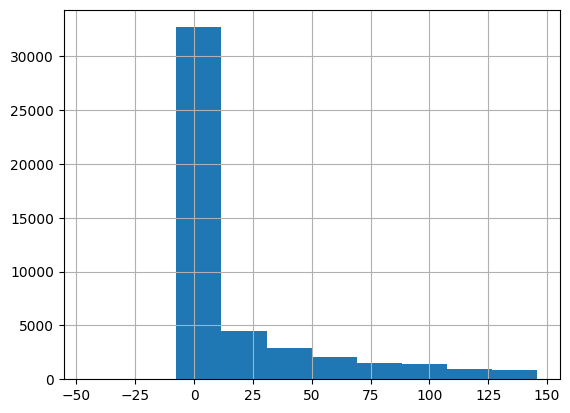

In [ ]:
pay_diff_w_outliers['cost_diff'].hist()

In [ ]:
pay_diff_w_outliers[pay_diff_w_outliers['cost_diff']>50]

,created_date,date_x,order_year,order_month,order_day,time,order_id,total_paid,id,id_order,product_id,product_quantity,sku,unit_price,date_y,total_cost,cost_diff
11,2017-01-01 11:00:40,2017-01-01,2017,January,1,11:00:40,299610,152.97,1119255,299610,0,1,APP0023,55.99,2017-01-01 10:52:42,55.99,96.98
12,2017-01-01 11:00:40,2017-01-01,2017,January,1,11:00:40,299610,152.97,1119257,299610,0,1,APP1214,84.99,2017-01-01 10:53:10,84.99,67.98
32,2017-01-01 13:13:25,2017-01-01,2017,January,1,13:13:25,299681,111.47,1119419,299681,0,1,SPE0161,35.14,2017-01-01 13:07:07,35.14,76.33
40,2017-01-01 14:56:18,2017-01-01,2017,January,1,14:56:18,299696,79.00,1119448,299696,0,1,KEN0212,18.04,2017-01-01 13:27:25,18.04,60.96
60,2017-01-01 18:38:51,2017-01-01,2017,January,1,18:38:51,299858,114.33,1119740,299858,0,1,SAT0014,12.34,2017-01-01 18:35:08,12.34,101.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56710,2018-03-13 19:41:35,2018-03-13,2018,March,13,19:41:35,526615,868.96,1648662,526615,0,1,LGE0057,749.00,2018-03-13 19:29:26,749.00,119.96
56770,2018-03-14 11:56:19,2018-03-14,2018,March,14,11:56:19,525664,85.73,1649399,525664,0,3,APP0698,8.26,2018-03-14 11:37:07,24.78,60.95
56771,2018-03-14 11:56:19,2018-03-14,2018,March,14,11:56:19,525664,85.73,1649423,525664,0,1,DLK0033,16.52,2018-03-14 11:39:53,16.52,69.21
56772,2018-03-14 11:56:19,2018-03-14,2018,March,14,11:56:19,525664,85.73,1649468,525664,0,1,TUC0336,7.93,2018-03-14 11:43:59,7.93,77.80


In [ ]:
pay_diff_w_outliers.describe()

,order_year,order_day,order_id,total_paid,id,id_order,product_id,product_quantity,unit_price,total_cost,cost_diff
count,46975.00,46975.00,46975.00,46975.00,46975.00,46975.00,46975.00,46975.00,46975.00,46975.00,46975.00
mean,2017.22,16.64,414095.37,166.89,1384706.52,414095.37,0.00,1.12,136.70,146.54,20.35
std,0.41,8.97,66151.82,206.67,152425.44,66151.82,0.00,0.79,181.99,208.33,32.00
min,2017.00,1.00,241423.00,0.00,1119116.00,241423.00,0.00,1.00,1.60,1.99,-45.90
25%,2017.00,9.00,361545.00,47.97,1261733.50,361545.00,0.00,1.00,26.99,29.98,3.99
50%,2017.00,17.00,416252.00,92.98,1387498.00,416252.00,0.00,1.00,64.99,68.99,4.99
75%,2017.00,24.00,470575.00,189.98,1514794.00,470575.00,0.00,1.00,156.39,165.59,21.97
max,2018.00,31.00,527112.00,6876.94,1649593.00,527112.00,0.00,72.00,999.99,6876.80,145.79


In [ ]:
pay_diff_w_outliers

,created_date,date_x,order_year,order_month,order_day,time,order_id,total_paid,id,id_order,product_id,product_quantity,sku,unit_price,date_y,total_cost,cost_diff
0,2017-01-01 01:51:47,2017-01-01,2017,January,1,01:51:47,299545,51.48,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,3.99
1,2017-01-01 01:57:34,2017-01-01,2017,January,1,01:57:34,299546,18.99,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,0.00
2,2017-01-01 02:02:38,2017-01-01,2017,January,1,02:02:38,295347,72.19,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,0.00
3,2017-01-01 02:30:08,2017-01-01,2017,January,1,02:30:08,299556,65.89,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,4.99
4,2017-01-01 02:39:47,2017-01-01,2017,January,1,02:39:47,299561,154.48,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56774,2018-03-14 11:57:46,2018-03-14,2018,March,14,11:57:46,527017,27.98,1649387,527017,0,1,LOG0224,22.99,2018-03-14 11:35:55,22.99,4.99
56775,2018-03-14 11:58:40,2018-03-14,2018,March,14,11:58:40,527096,34.96,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,4.99
56776,2018-03-14 11:59:55,2018-03-14,2018,March,14,11:59:55,526960,23.97,1649290,526960,0,2,APP0698,9.99,2018-03-14 11:27:08,19.98,3.99
56777,2018-03-14 12:02:58,2018-03-14,2018,March,14,12:02:58,527023,18.98,1649394,527023,0,1,APP0927,13.99,2018-03-14 11:36:09,13.99,4.99


### All Sales Data

In [ ]:
all_data = pay_diff_w_outliers.merge(
    clean_products,
    how = 'inner',
    right_on = 'sku',
    left_on = 'sku',
    suffixes = ('_orders', '_products')
).merge(
    clean_brands,
    how = 'inner',
    left_on = 'product_brand',
    right_on = 'short'
).dropna()

In [ ]:
all_data.loc[all_data['product_category'] == 'computer', 'product_category'] = 'computers'

In [ ]:
all_data.shape

(46928, 29)

In [ ]:
all_data.columns

Index(['created_date', 'date_x', 'order_year', 'order_month', 'order_day',
       'time', 'order_id', 'total_paid', 'id', 'id_order', 'product_id',
       'product_quantity', 'sku', 'unit_price', 'date_y', 'total_cost',
       'cost_diff', 'name', 'desc', 'price', 'promo_price', 'in_stock', 'type',
       'new_promo', 'product_brand', 'discount', 'product_category', 'short',
       'long'],
      dtype='object')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
all_data.to_csv('/content/drive/MyDrive/WBS/clean_combined_data', index=False)